1. 学習率と荷重減衰のパラメータを検証データを使って最適化を行う
2. 学習率とDropout比率のパラメータを検証データを使って最適化を行う

In [5]:
import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.util import shuffle_dataset
from common.trainer import Trainer

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:500]
t_train = t_train[:500]

validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_train, t_train = shuffle_dataset(x_train, t_train)
x_validation = x_train[:validation_num]
t_validation = t_train[:validation_num]

x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [3]:
def train_lr_weight_decay(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100, 100], output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_validation, t_validation, epochs=epocs, mini_batch_size=100, optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

In [4]:
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    weight_decay = 10 ** np.random.uniform(-8, -4) # [-8, -4)の中からランダムに一つ生成
    lr = 10 ** np.random.uniform(-6, -2)

    val_acc_list, train_acc_list = train_lr_weight_decay(lr, weight_decay)
    print("val acc:{} | lr:{}, weight_decay:{}".format(val_acc_list[-1], lr, weight_decay))
    key = "lr: {}, weight_decay: {}".format(lr, weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.1 | lr:6.440214951482539e-06, weight_decay:2.458151238336314e-05
val acc:0.25 | lr:0.0008952922690422693, weight_decay:1.306881899859194e-07
val acc:0.13 | lr:0.00048118035294009983, weight_decay:1.1843225598532578e-08
val acc:0.41 | lr:0.00237887695307366, weight_decay:2.0956462206011827e-06
val acc:0.08 | lr:7.595844984723134e-06, weight_decay:4.4289871017750265e-05
val acc:0.17 | lr:0.00047022381271499445, weight_decay:2.9775424604791192e-08
val acc:0.09 | lr:4.185633719381283e-05, weight_decay:4.2927467017143455e-08
val acc:0.62 | lr:0.004568405390624143, weight_decay:3.617413545104795e-07
val acc:0.12 | lr:6.992005823365311e-05, weight_decay:2.1251490408913597e-07
val acc:0.08 | lr:1.6314799053227232e-06, weight_decay:2.028625499075576e-06
val acc:0.1 | lr:0.0001278007733841451, weight_decay:1.627673172336718e-08
val acc:0.05 | lr:4.6922601681779116e-05, weight_decay:8.444254126941714e-07
val acc:0.16 | lr:0.0011418708666243013, weight_decay:4.608152623475965e-07
val acc

In [8]:
def plot_graph():
    print("=========== Hyper-Parameter Optimization Result ===========")
    graph_draw_num = 20
    col_num = 5
    row_num = int(np.ceil(graph_draw_num / col_num))
    index = 1
    plt.figure(figsize=(12, 14))
    for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
        print("Best-{}(val acc:{} | {}".format(index, val_acc_list[-1], key))
        plt.subplot(row_num, col_num, index)
        plt.title("Best-{}".format(index))
        plt.ylim(0.0, 1.0)
        if index % 5:
            plt.yticks([])
        plt.xticks([])
        x = np.arange(len(val_acc_list))
        plt.plot(x, val_acc_list)
        plt.plot(x, results_train[key], "--")
        index += 1

        if index > graph_draw_num:
            break

    plt.show()

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.78 | lr: 0.008846172388664907, weight_decay: 1.1002084318930846e-05
Best-2(val acc:0.71 | lr: 0.006949101616763241, weight_decay: 3.1052532337977155e-06
Best-3(val acc:0.71 | lr: 0.005173826626412515, weight_decay: 1.0288746120065953e-07
Best-4(val acc:0.7 | lr: 0.005749612106408825, weight_decay: 4.226244405739026e-05
Best-5(val acc:0.7 | lr: 0.006412726005789087, weight_decay: 4.430351121852255e-06
Best-6(val acc:0.62 | lr: 0.004568405390624143, weight_decay: 3.617413545104795e-07
Best-7(val acc:0.61 | lr: 0.004016914320861994, weight_decay: 1.0607762251774539e-07
Best-8(val acc:0.49 | lr: 0.0024279448547363026, weight_decay: 4.102739444847189e-05
Best-9(val acc:0.49 | lr: 0.00218362119657515, weight_decay: 4.334696372690879e-06
Best-10(val acc:0.41 | lr: 0.00237887695307366, weight_decay: 2.0956462206011827e-06
Best-11(val acc:0.41 | lr: 0.0030696668978750447, weight_decay: 2.003928013968679e-07
Best-12(val

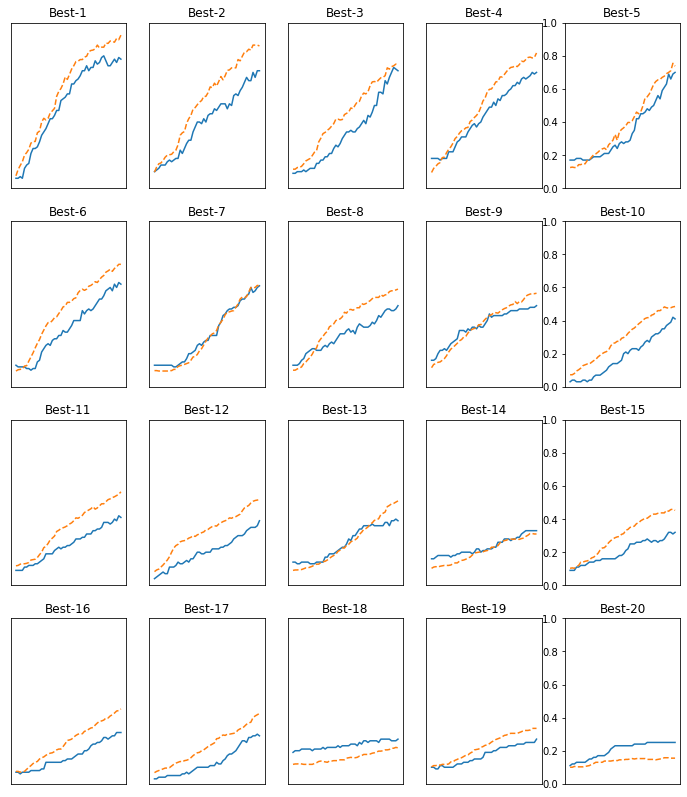

In [9]:
plot_graph()

In [10]:
def train_lr_dropout_ration(lr, dropout_ration, epocs=50):
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100, 100], output_size=10, use_dropout=True, dropout_ration=dropout_ration)
    trainer = Trainer(network, x_train, t_train, x_validation, t_validation, epochs=epocs, mini_batch_size=100, optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

In [15]:
optimization_trial = 60
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    dropout_ration = np.random.uniform(0, 0.5) # [0, 0.5)の中からランダムに一つ生成
    lr = 10 ** np.random.uniform(-6, -2)

    val_acc_list, train_acc_list = train_lr_dropout_ration(lr, dropout_ration, epocs=100)
    print("val acc:{} | lr:{}, dropout_ration:{}".format(val_acc_list[-1], lr, dropout_ration))
    key = "lr: {}, dropout_ration: {}".format(lr, dropout_ration)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.09 | lr:0.0003734376001499322, dropout_ration:0.2645931133773405
val acc:0.2 | lr:0.00194594605851046, dropout_ration:0.19918379882348364
val acc:0.15 | lr:0.000344582288833233, dropout_ration:0.41341955240748435
val acc:0.13 | lr:0.0010602670710219931, dropout_ration:0.15092733529013574
val acc:0.04 | lr:0.00023981037663699074, dropout_ration:0.1765718705436619
val acc:0.08 | lr:2.675939596939218e-06, dropout_ration:0.1133757683975321
val acc:0.37 | lr:0.002815362468110837, dropout_ration:0.07393712054940627
val acc:0.16 | lr:0.003208884332737099, dropout_ration:0.24927977278088442
val acc:0.08 | lr:2.9916905884879526e-06, dropout_ration:0.27906893017197704
val acc:0.07 | lr:0.00010167155024252748, dropout_ration:0.06129206953096722
val acc:0.13 | lr:9.069184004839166e-05, dropout_ration:0.30449472080784723
val acc:0.17 | lr:0.0023682115184950293, dropout_ration:0.33997362966578687
val acc:0.12 | lr:1.7620324142936213e-06, dropout_ration:0.04602980721653577
val acc:0.08 | lr

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.72 | lr: 0.0057230799853492855, dropout_ration: 0.04540032930065374
Best-2(val acc:0.64 | lr: 0.004617006609359059, dropout_ration: 0.05226609655222819
Best-3(val acc:0.61 | lr: 0.007798623686510913, dropout_ration: 0.09006058784834597
Best-4(val acc:0.37 | lr: 0.002815362468110837, dropout_ration: 0.07393712054940627
Best-5(val acc:0.37 | lr: 0.007091937962034708, dropout_ration: 0.16241964717829588
Best-6(val acc:0.32 | lr: 0.0011772111752863322, dropout_ration: 0.03483069559745511
Best-7(val acc:0.23 | lr: 0.0008975143794656168, dropout_ration: 0.04572910457263024
Best-8(val acc:0.2 | lr: 0.00194594605851046, dropout_ration: 0.19918379882348364
Best-9(val acc:0.18 | lr: 0.0008789455900412379, dropout_ration: 0.4184181717041397
Best-10(val acc:0.18 | lr: 0.0025592976136216555, dropout_ration: 0.2872538040189882
Best-11(val acc:0.17 | lr: 0.0023682115184950293, dropout_ration: 0.33997362966578687
Best-12(val 

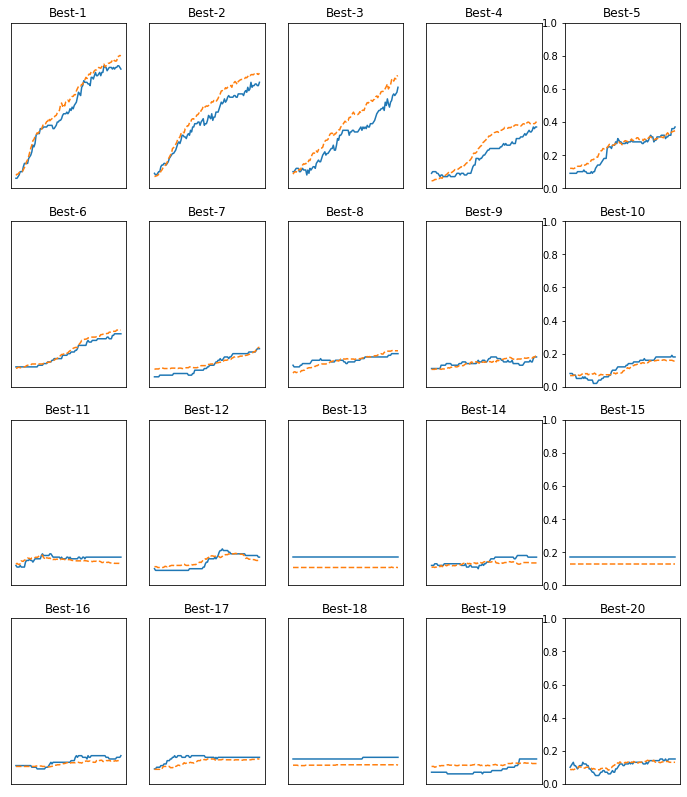

In [16]:
plot_graph()